## ConvNet Using Real-life Data

Dedicated to Luke  

<img src="b650cd365dcbe93e6783d28153f2f5e7.jpg">

### Additional Resources

ImageDataGenerator class: https://keras.io/preprocessing/image/ 

https://fairyonice.github.io/Learn-about-ImageDataGenerator.html

Transfer Learning <br>
How to freeze/lock layers, explore the documentation, which includes an example using MobileNet architecture: https://www.tensorflow.org/tutorials/images/transfer_learning

Reference: Convolutional Neural Networks in Tensorflow by Laurence Moroney

### Load Libraries

In [1]:
import tensorflow as tf
import os
import zipfile
from shutil import copyfile
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# !pip install tensorflow==2.0.0-alpha0

### Helper Function to Evaluate Model

In [2]:
def model_eval(model):
    acc      = model.history[     'acc' ]
    val_acc  = model.history[ 'val_acc' ]
    loss     = model.history[    'loss' ]
    val_loss = model.history['val_loss' ]

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    sns.set()
    plt.plot  ( epochs,     acc, label='Training accuracy' )
    plt.plot  ( epochs, val_acc, label='Validation accuracy' )
    plt.title ('Training and validation accuracy')
    plt.figure()

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot  ( epochs,     loss, label='Training loss' )
    plt.plot  ( epochs, val_loss, label='Validation loss' )
    plt.title ('Training and validation loss'   );

### Unzip File

In [30]:
import os
import zipfile

local_zip = r'C:\Users\Miaojunli\OneDrive\Documents\Machine Learning & AI\TensorFlowInPractice\lucas-or-dog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(r'C:\Users\Miaojunli\OneDrive\Documents\Machine Learning & AI\TensorFlowInPractice\lucas-or-dog')

### Set Up File Directory

In [2]:
path = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/'

try:
    os.mkdir(path + 'lucas-or-dog')
    os.mkdir(path + 'lucas-or-dog/training')
    os.mkdir(path + 'lucas-or-dog/validation')
    os.mkdir(path + 'lucas-or-dog/training/lucas')
    os.mkdir(path + 'lucas-or-dog/training/dq')
    os.mkdir(path + 'lucas-or-dog/validation/lucas')
    os.mkdir(path + 'lucas-or-dog/validation/dq')

except OSError:
    pass

### Function Splits File into Train & Validation

In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
                print(filename + " is zero lenght, so ignoring")
    
    training_length = int(len(files) * SPLIT_SIZE)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[:training_length]
    testing_set = shuffled_set[training_length:]
    
    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
    
    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

lucas_source_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/lucas/'
train_lucas_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/training/lucas/'
validation_lucas_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/validation/lucas/'
dq_source_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/dq/'
train_dq_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/training/dq/'
validation_dq_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/validation/dq/'

split_size = .7
split_data(lucas_source_dir, train_lucas_dir, validation_lucas_dir, split_size)
split_data(dq_source_dir, train_dq_dir, validation_dq_dir, split_size)


In [55]:
train_lucas_names = os.listdir(train_lucas_dir)
print(train_lucas_names[:10])

train_dq_names = os.listdir(train_dq_dir)
print(train_dq_names[:10])

validation_horse_hames = os.listdir(validation_lucas_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_dq_dir)
print(validation_human_names[:10])

['011b7cbd6b4f2e5463eff1563ad1fde01837511087 (2).jpg', '012d8a11a07576dd02aa409e9801c653f8f38dcc1e (2).jpg', '01a54b108ea6457f81379993372381c8c5b9c32441.jpg', '01cd7aac2ab495c8eb2c2fae10a775daf1633c7b13.jpg', '01d4db8e246710b3660bf76371158cd0e53f36e9c3.jpg', '01f07b0a522ba47d1189a9aaf25eabef50c60253e4 (2).jpg', '01fc71cbdb27684daadf420f0b6a3e76b0dd27aca5 (2).jpg', '20180607_063834.jpg', 'DSC00016.JPG', 'DSC00994 (2).jpeg']
['DSC00335 (2).jpeg', 'DSC01531.JPG', 'DSC01533.JPG', 'DSC01535.JPG', 'DSC01620.JPG', 'DSC01770.JPG', 'DSC01771.JPG', 'DSC02905.JPG', 'DSC02908.jpg', 'DSC02929.JPG']
['013012514ff282abcba453b828628ce79a6b9b9543 (2).jpg', '0134d89c654abca0ae393ea454795de5efde25d8af.jpg', '014db873fe5883ef12efe6a9eccc150367c485fbd6 (2).jpg', '016ede2efda071ddad18b487f6d46207ae7acf8bb2 (2).jpg', '0181baf84b2334076bc6bc66d36051ea2e39fedbd5.jpg', 'DSC01854 (2).jpeg', 'DSC02341 (3).jpeg', 'DSC03245 (2).jpeg', 'DSC03581.jpeg', 'DSC03664.jpeg']
['20180510_180902.jpg', 'DSC00448 - Copy.JPG', 

In [8]:
print('total training Lucas images:', len(os.listdir(train_lucas_dir)))
print('total training DQ images:', len(os.listdir(train_dq_dir)))
print('total validation Lucas images:', len(os.listdir(validation_lucas_dir)))
print('total validation DQ images:', len(os.listdir(validation_dq_dir)))

total training Lucas images: 60
total training DQ images: 34
total validation Lucas images: 26
total validation DQ images: 15


### Examine Images

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

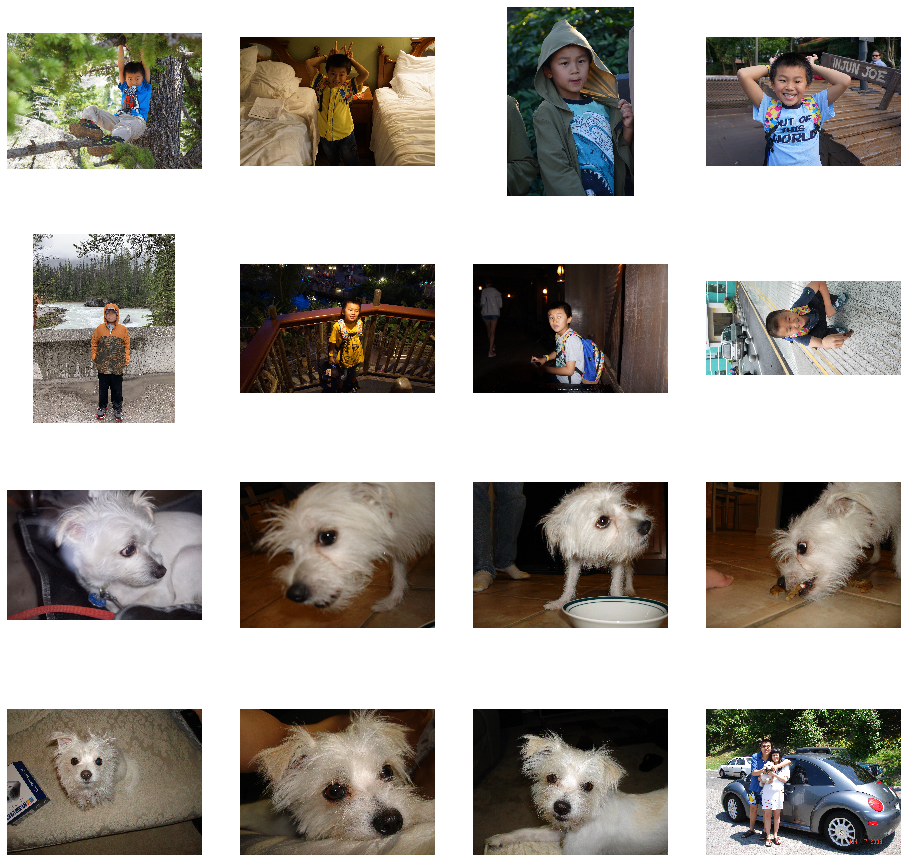

In [10]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_lucas_pix = [os.path.join(train_lucas_dir, fname) 
                for fname in train_lucas_names[pic_index-8:pic_index]]
next_dq_pix = [os.path.join(train_dq_dir, fname) 
                for fname in train_dq_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_lucas_pix+next_dq_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Data Preprocessing

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir='C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/training/'
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/validation/'
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 94 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


## Model 1: Define Basic Model

In [48]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 33, 33, 64)       

In [50]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Train Model

In [51]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

Epoch 1/15
4/4 [==============================] - 117s 29s/step - loss: 1.0586 - acc: 0.5160 - val_loss: 0.9781 - val_acc: 0.6341
Epoch 2/15
4/4 [==============================] - 89s 22s/step - loss: 0.7132 - acc: 0.6383 - val_loss: 0.6234 - val_acc: 0.6341
Epoch 3/15
4/4 [==============================] - 87s 22s/step - loss: 0.6437 - acc: 0.6383 - val_loss: 0.6329 - val_acc: 0.6341
Epoch 4/15
4/4 [==============================] - 91s 23s/step - loss: 0.5999 - acc: 0.6383 - val_loss: 0.9700 - val_acc: 0.6341
Epoch 5/15
4/4 [==============================] - 89s 22s/step - loss: 0.6654 - acc: 0.6569 - val_loss: 0.5891 - val_acc: 0.6341
Epoch 6/15
4/4 [==============================] - 88s 22s/step - loss: 0.5474 - acc: 0.6383 - val_loss: 0.5530 - val_acc: 0.8293
Epoch 7/15
4/4 [==============================] - 88s 22s/step - loss: 0.6512 - acc: 0.6995 - val_loss: 0.5865 - val_acc: 0.6341
Epoch 8/15
4/4 [==============================] - 88s 22s/step - loss: 0.5904 - acc: 0.6463 - va

### Evaluate Model

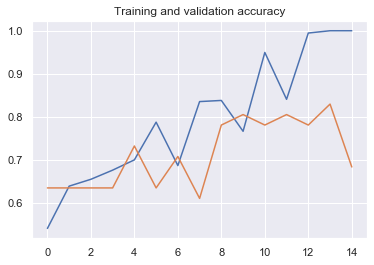

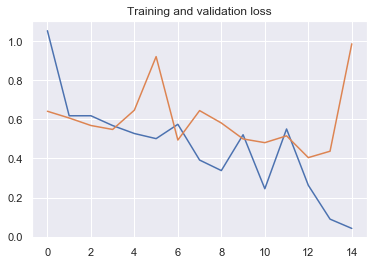

In [69]:
_ = model_eval(history)

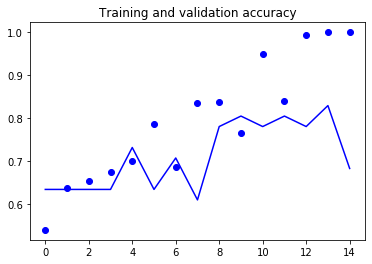

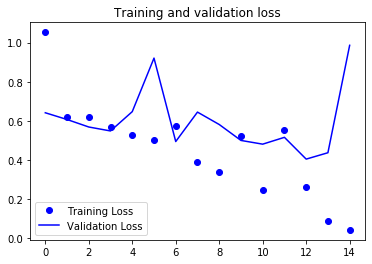

In [23]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Review Model Layers

C:\Users\Miaojunli\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


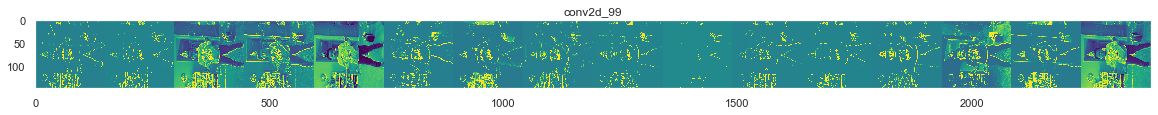

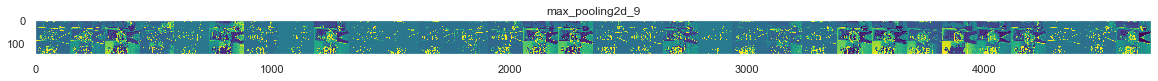

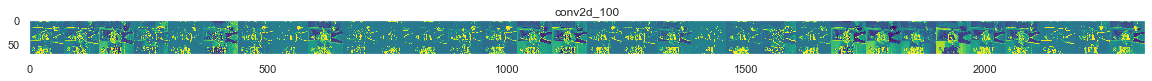

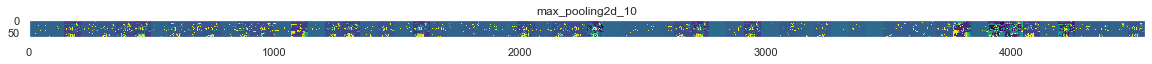

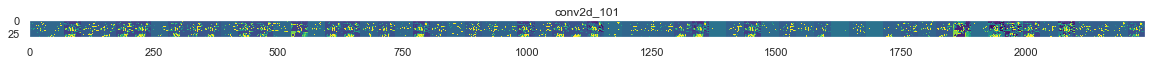

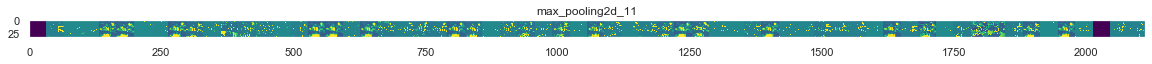

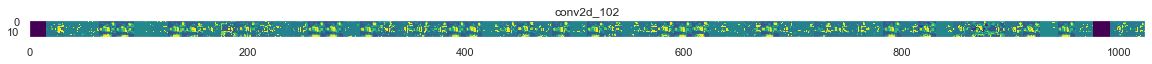

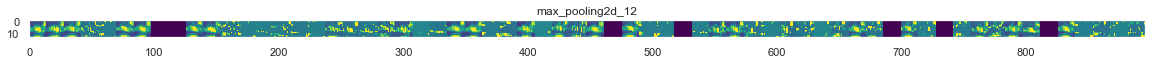

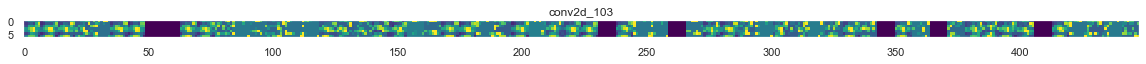

In [57]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
lucas_img_files = [os.path.join(train_lucas_dir, f) for f in train_lucas_names]
dq_img_files = [os.path.join(train_dq_dir, f) for f in train_dq_names]
img_path = random.choice(lucas_img_files + dq_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Model 2: Model w Augmentation

### Augmentation

These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

- rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures. <br>
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
- shear_range is for randomly applying shearing transformations.
- zoom_range is for randomly zooming inside pictures.
- horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_dir='C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/training/'
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_dir = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog/validation/'
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 94 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [23]:
model2 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model2.summary()

model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [24]:
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=4,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

Epoch 1/15
4/4 [==============================] - 111s 28s/step - loss: 1.7508 - acc: 0.6356 - val_loss: 0.7435 - val_acc: 0.6341
Epoch 2/15
4/4 [==============================] - 90s 23s/step - loss: 0.6531 - acc: 0.6383 - val_loss: 0.6026 - val_acc: 0.6341
Epoch 3/15
4/4 [==============================] - 88s 22s/step - loss: 0.6360 - acc: 0.6383 - val_loss: 0.6492 - val_acc: 0.6341
Epoch 4/15
4/4 [==============================] - 88s 22s/step - loss: 0.6226 - acc: 0.6383 - val_loss: 0.5728 - val_acc: 0.6341
Epoch 5/15
4/4 [==============================] - 95s 24s/step - loss: 0.5641 - acc: 0.6915 - val_loss: 0.5255 - val_acc: 0.6341
Epoch 6/15
4/4 [==============================] - 91s 23s/step - loss: 0.5632 - acc: 0.7340 - val_loss: 1.0236 - val_acc: 0.6341
Epoch 7/15
4/4 [==============================] - 88s 22s/step - loss: 0.6853 - acc: 0.6223 - val_loss: 0.5574 - val_acc: 0.6341
Epoch 8/15
4/4 [==============================] - 88s 22s/step - loss: 0.8674 - acc: 0.6941 - va

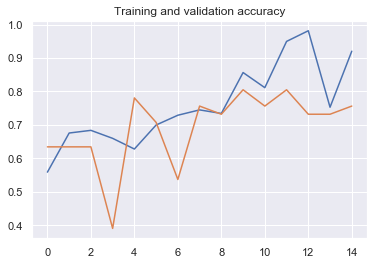

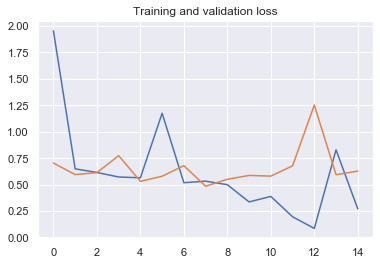

In [70]:
_ = model_eval(history2)

## Model 3: Add Dropout

Why adding dropout help? Because neighbor neurons have similar weights and can skew the final training

In [33]:
model3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# model2.summary()

model3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

history3 = model3.fit_generator(
      train_generator,
      steps_per_epoch=4,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4)

Epoch 1/15
4/4 [==============================] - 127s 32s/step - loss: 1.1287 - acc: 0.5931 - val_loss: 0.7367 - val_acc: 0.6341
Epoch 2/15
4/4 [==============================] - 108s 27s/step - loss: 0.6630 - acc: 0.6383 - val_loss: 0.6221 - val_acc: 0.6341
Epoch 3/15
4/4 [==============================] - 102s 26s/step - loss: 0.6147 - acc: 0.6383 - val_loss: 0.6338 - val_acc: 0.6341
Epoch 4/15
4/4 [==============================] - 107s 27s/step - loss: 0.6267 - acc: 0.6543 - val_loss: 0.6427 - val_acc: 0.6341
Epoch 5/15
4/4 [==============================] - 106s 26s/step - loss: 0.5950 - acc: 0.6410 - val_loss: 0.5832 - val_acc: 0.6341
Epoch 6/15
4/4 [==============================] - 103s 26s/step - loss: 0.6878 - acc: 0.6144 - val_loss: 0.6922 - val_acc: 0.5122
Epoch 7/15
4/4 [==============================] - 105s 26s/step - loss: 0.6260 - acc: 0.6223 - val_loss: 0.5935 - val_acc: 0.7317
Epoch 8/15
4/4 [==============================] - 103s 26s/step - loss: 0.5684 - acc: 0.76

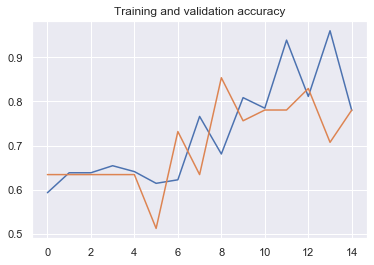

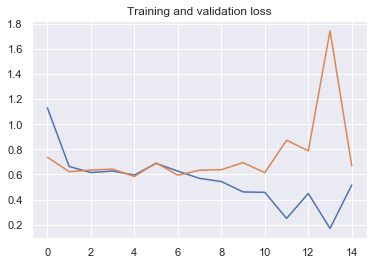

In [71]:
_ = model_eval(history3)

## Model 4: Model w Augmentation, Transfer Learning, Dropouts & Callbacks

In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
        
callback=myCallback()

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = 'C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

print('Pre-trained Model has ', len(pre_trained_model.layers), ' layers')
# pre_trained_model.summary()

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
   layer.trainable = False # lock or freeze a layer from retraining
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Pre-trained Model has  311  layers
last layer output shape:  (None, 17, 17, 768)


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

model5 = Model(pre_trained_model.input, x) 

model5.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [7]:
history5 = model5.fit_generator(
      train_generator,
      steps_per_epoch=4,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=4,
      callbacks=[callback])

Epoch 1/15
4/4 [==============================] - 269s 67s/step - loss: 2.8021 - acc: 0.6809 - val_loss: 0.0258 - val_acc: 1.0000
Epoch 2/15
4/4 [==============================] - 242s 60s/step - loss: 1.2974 - acc: 0.7872 - val_loss: 0.0118 - val_acc: 1.0000
Epoch 3/15
4/4 [==============================] - 235s 59s/step - loss: 0.2047 - acc: 0.9468 - val_loss: 0.0490 - val_acc: 0.9756
Epoch 4/15
3/4 [=====================>........] - ETA: 55s - loss: 0.2723 - acc: 0.9433 
Reached 95% accuracy so cancelling training!
4/4 [==============================] - 275s 69s/step - loss: 0.2147 - acc: 0.9548 - val_loss: 5.8292e-04 - val_acc: 1.0000


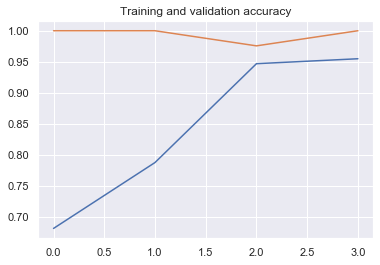

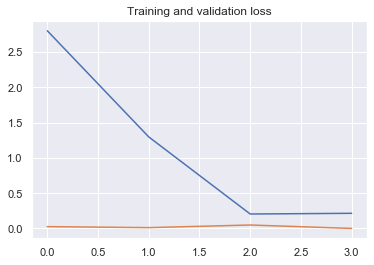

In [8]:
_ = model_eval(history5)

### Load & Save Model

In [9]:
# this is the final version
model5.save("lucas_dq.h5")

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("lucas_dq.h5")

### Evaluate Model w Test Images

_this is the google colab implementation, skip_

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is Lucas")
  else:
    print(fn + " is Luke")

*Jupyter Notebook Implementation*

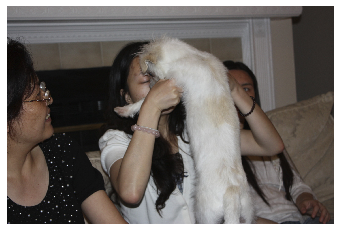

[0.00073647]
DQ0002.jpg is Luke


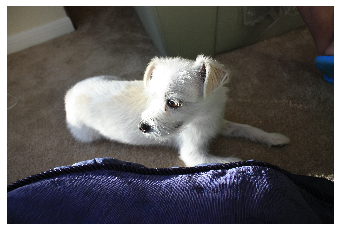

[4.370795e-07]
DQ7551.JPG is Luke


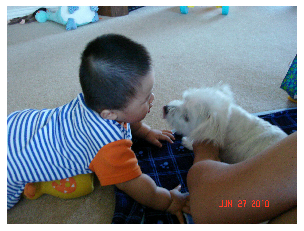

[8.156271e-05]
DSC03297.JPG is Luke


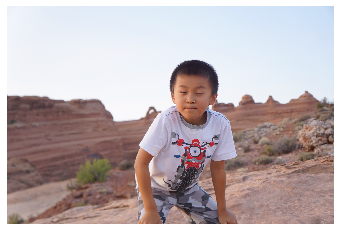

[0.9999331]
Lucas0134d89c654abca0ae393ea454795de5efde25d8af.jpg is Lucas


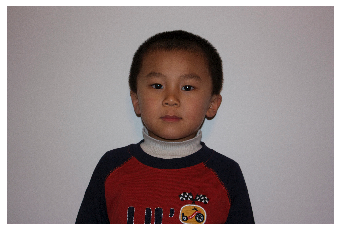

[0.9999982]
Lucas02.jpeg is Lucas


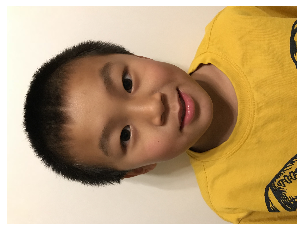

[0.9998498]
Lucas03.jpg is Lucas


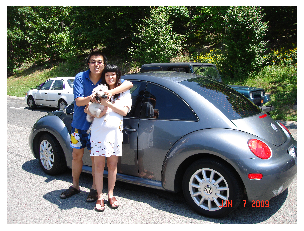

[0.00114439]
Luke&Us.JPG is Luke


In [47]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.image as mpimg

test_dir = "C:/Users/Miaojunli/OneDrive/Documents/Machine Learning & AI/TensorFlowInPractice/lucas-or-dog-test/"

test_files = os.listdir(test_dir)

for fn in test_files:

  path = test_dir + fn
  img = image.load_img(path, target_size=(300, 300))
  img_show = mpimg.imread(path)
  plt.imshow(img_show)
  plt.axis('Off')
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x/255

  images = np.vstack([x])
  classes = model5.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is Lucas")
  else:
    print(fn + " is Luke")